In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
ab_test = pd.read_csv('../data/ab-test.csv')
ab_test_count = ab_test[ab_test['time'] == 'after']
ab_test_count.count()

uid      22
diff     22
time     22
group    22
dtype: int64

In [4]:
test = ab_test[ab_test['group'] == 'test']
control = ab_test[ab_test['group'] == 'control']

pivot_test = test.pivot(
    index='uid',
    columns='time',
    values='diff')

pivot_control = control.pivot(
    index='uid',
    columns='time',
    values='diff')

print(pivot_test.count())
print(pivot_control.count())

time
after     7
before    7
dtype: int64
time
after     15
before    15
dtype: int64


[Text(1, 0, 'control'), Text(2, 0, 'test')]

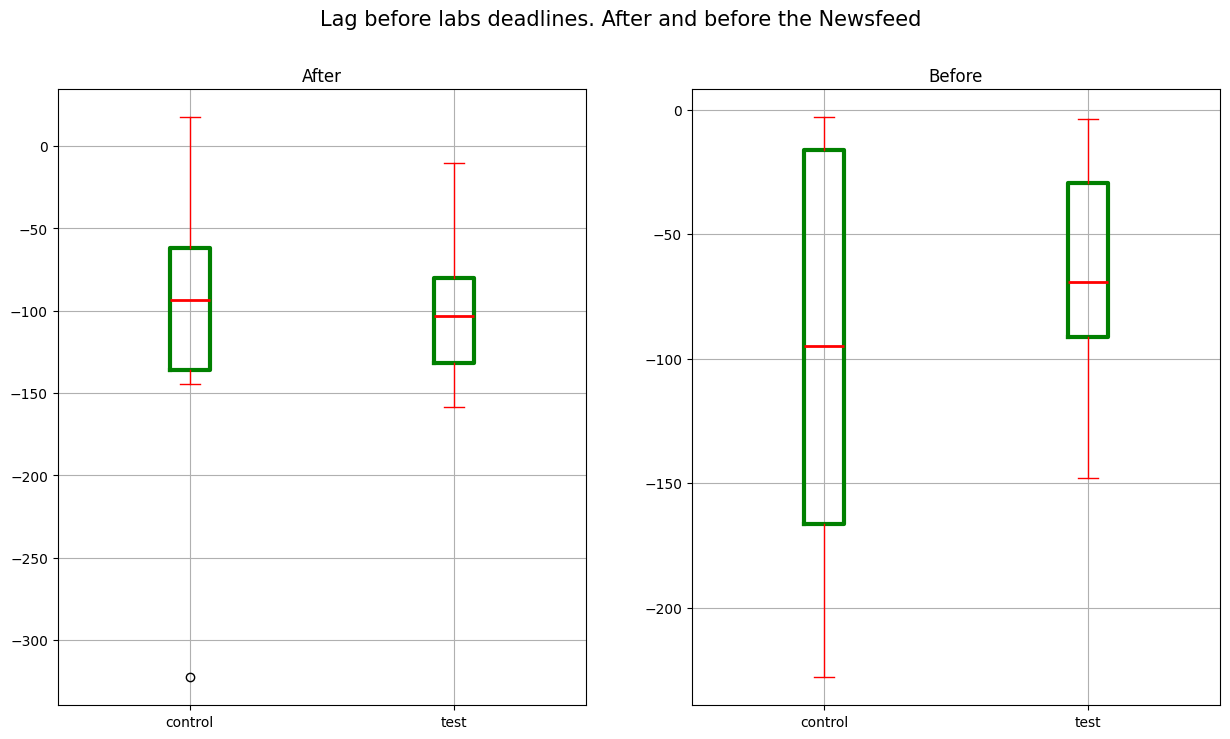

In [5]:
fig, (ax_after, ax_before) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)

ax_after.boxplot([pivot_control['after'], pivot_test['after']], boxprops=dict(color='green', linewidth=3), capprops=dict(color='red'), medianprops = dict(color='red', linewidth=2), whiskerprops = dict(color='red'))
ax_after.set_title('After')
ax_after.grid(True)
ax_after.set_xticklabels(['control', 'test'])


ax_before.boxplot([pivot_control['before'], pivot_test['before']], boxprops=dict(color='green', linewidth=3), capprops=dict(color='red'), medianprops = dict(color='red', linewidth=2), whiskerprops = dict(color='red'))
ax_before.set_title('Before')
ax_before.grid(True)
ax_before.set_xticklabels(['control', 'test'])

In [6]:
conn.close()

In [7]:
IQR = 150